<a href="https://colab.research.google.com/github/soyebganja/DL-Practice-Projects/blob/main/7%3ANeural%20Networks%20in%20PyTorch/7_3_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
import torch.optim as optim

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 36.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.38MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.33MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [7]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)

In [8]:
images.shape

torch.Size([64, 1, 28, 28])

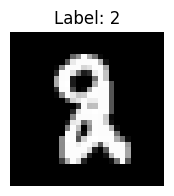

In [14]:
plt.figure(figsize=(2, 2))
plt.imshow(images[1].squeeze(), cmap='gray')
plt.title(f'Label: {labels[1]}')
plt.axis('off')
plt.show()


In [15]:
class DigitsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        return self.network(x)

In [16]:
model = DigitsClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [17]:
epochs = 5

for epoch in range(epochs):
  for images, labels in train_loader:
    # 1. Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    # 2. Backward pass
    optimizer.zero_grad()
    loss.backward()

    # 3. Update weights
    optimizer.step()

  print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.2540
Epoch [2/5], Loss: 0.1529
Epoch [3/5], Loss: 0.2240
Epoch [4/5], Loss: 0.1114
Epoch [5/5], Loss: 0.0052


In [18]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 97.01%


In [19]:
total, correct

(10000, 9701)